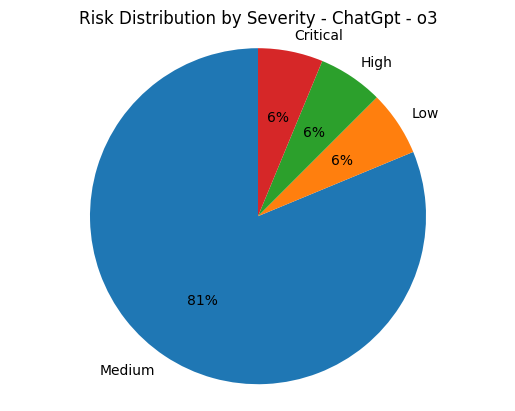

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- data ----------------------------------------------------------
risks = [
    ("ARCH-SECURITY-01", "Medium"),
    ("ARCH-SECURITY-02", "Medium"),
    ("ARCH-DEPLOYMENT-01", "Medium"),
    ("ARCH-PERFORMANCE-01", "Medium"),
    ("ARCH-QUALITY-01", "Medium"),
    ("ARCH-MAINTAINABILITY-01", "Low"),
    ("CODE-SECURITY-01", "High"),
    ("CODE-SECURITY-02", "Medium"),
    ("CODE-SECURITY-03", "Medium"),
    ("CODE-SECURITY-04", "Medium"),
    ("CODE-SECURITY-05", "Medium"),
    ("CODE-PERFORMANCE-01", "Medium"),
    ("PLAN-PLANNING-01", "Critical"),
    ("PLAN-PLANNING-02", "Medium"),
    ("PLAN-PLANNING-03", "Medium"),
    ("PLAN-PLANNING-04", "Medium"),
]
df = pd.DataFrame(risks, columns=["Risk_ID", "Severity"])
# -------------------------------------------------------------------

counts = df["Severity"].value_counts()
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct="%1.0f%%", startangle=90)
ax.set_title("Risk Distribution by Severity - ChatGpt - o3")
ax.axis("equal")              # keep it circular
plt.show()


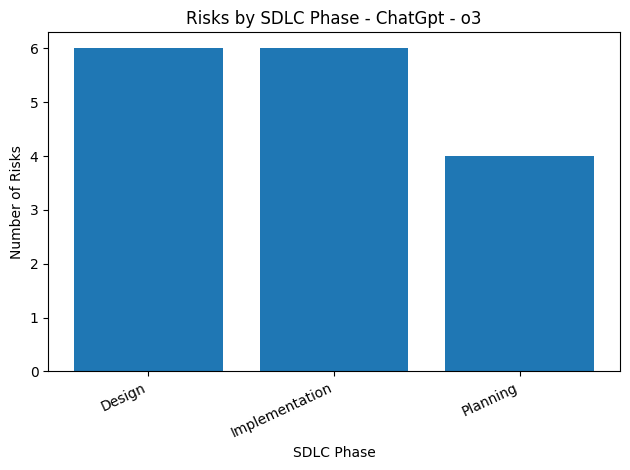

In [2]:
phase_map = {
    "ARCH-": "Design",
    "CODE-": "Implementation",
    "PLAN-": "Planning",
}

df["SDLC_Phase"] = df["Risk_ID"].str.extract(r"^(ARCH-|CODE-|PLAN-)").replace(phase_map)
phase_counts = df["SDLC_Phase"].value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(phase_counts.index, phase_counts.values)
ax.set_xlabel("SDLC Phase")
ax.set_ylabel("Number of Risks")
ax.set_title("Risks by SDLC Phase - ChatGpt - o3")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


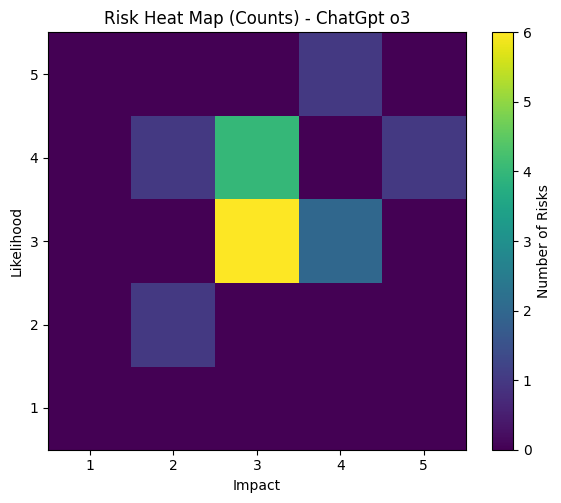

In [3]:
# For each risk add its numeric Likelihood (L) and Impact (I)
ratings = [
    # Risk_ID, L, I
    ("ARCH-SECURITY-01", 3, 4),
    ("ARCH-SECURITY-02", 4, 3),
    ("ARCH-DEPLOYMENT-01", 3, 3),
    ("ARCH-PERFORMANCE-01", 3, 3),
    ("ARCH-QUALITY-01", 4, 2),
    ("ARCH-MAINTAINABILITY-01", 2, 2),
    ("CODE-SECURITY-01", 4, 5),
    ("CODE-SECURITY-02", 4, 3),
    ("CODE-SECURITY-03", 4, 3),
    ("CODE-SECURITY-04", 3, 3),
    ("CODE-SECURITY-05", 3, 3),
    ("CODE-PERFORMANCE-01", 3, 3),
    ("PLAN-PLANNING-01", 5, 4),
    ("PLAN-PLANNING-02", 4, 3),
    ("PLAN-PLANNING-03", 3, 3),
    ("PLAN-PLANNING-04", 3, 4),
]
heat_df = pd.DataFrame(ratings, columns=["Risk_ID", "Likelihood", "Impact"])

matrix = pd.DataFrame(0, index=range(1, 6), columns=range(1, 6))
for _, r in heat_df.iterrows():
    matrix.loc[r["Likelihood"], r["Impact"]] += 1

fig, ax = plt.subplots(figsize=(6, 5))
c = ax.imshow(matrix, origin="lower")
ax.set_xticks(range(5)); ax.set_xticklabels(range(1, 6))
ax.set_yticks(range(5)); ax.set_yticklabels(range(1, 6))
ax.set_xlabel("Impact"); ax.set_ylabel("Likelihood")
ax.set_title("Risk Heat Map (Counts) - ChatGpt o3")
fig.colorbar(c, label="Number of Risks")
plt.tight_layout()
plt.show()


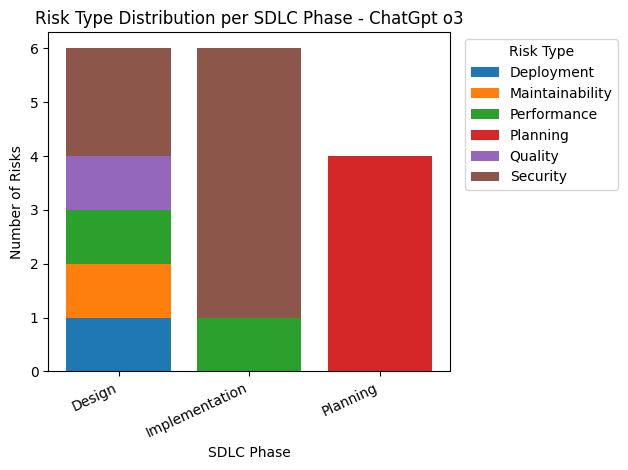

In [4]:
# Add Risk_Type and Phase information
type_map = {
    "SECURITY": "Security",
    "DEPLOYMENT": "Deployment",
    "PERFORMANCE": "Performance",
    "QUALITY": "Quality",
    "MAINTAINABILITY": "Maintainability",
    "PLANNING": "Planning",
}

types = {
    "ARCH-SECURITY-01": "SECURITY",
    "ARCH-SECURITY-02": "SECURITY",
    "ARCH-DEPLOYMENT-01": "DEPLOYMENT",
    "ARCH-PERFORMANCE-01": "PERFORMANCE",
    "ARCH-QUALITY-01": "QUALITY",
    "ARCH-MAINTAINABILITY-01": "MAINTAINABILITY",
    "CODE-SECURITY-01": "SECURITY",
    "CODE-SECURITY-02": "SECURITY",
    "CODE-SECURITY-03": "SECURITY",
    "CODE-SECURITY-04": "SECURITY",
    "CODE-SECURITY-05": "SECURITY",
    "CODE-PERFORMANCE-01": "PERFORMANCE",
    "PLAN-PLANNING-01": "PLANNING",
    "PLAN-PLANNING-02": "PLANNING",
    "PLAN-PLANNING-03": "PLANNING",
    "PLAN-PLANNING-04": "PLANNING",
}
df["Risk_Type"] = df["Risk_ID"].map(types).replace(type_map)

pivot = (
    df.groupby(["SDLC_Phase", "Risk_Type"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

fig, ax = plt.subplots()
bottom = None
for col in pivot.columns:
    values = pivot[col]
    ax.bar(pivot.index, values, bottom=bottom, label=col)
    bottom = values if bottom is None else bottom + values

ax.set_xlabel("SDLC Phase")
ax.set_ylabel("Number of Risks")
ax.set_title("Risk Type Distribution per SDLC Phase - ChatGpt o3")
ax.legend(title="Risk Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()
